In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def fa(x = 1, y = 1, size = (7,7)):
    return plt.subplots(x,y,figsize = size)
plt.ioff()

In [4]:
data = pd.read_csv(r'/Users/mirazrai/Downloads/other studies/Prosperity-3/algoresults/fdc69852-9edd-445f-9c9a-f516b3ad5e5c.csv', delimiter = ';')

In [8]:
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,1.157471
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.000000
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,-6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-1,199700,KELP,2020,27,NaN,NaN,NaN,NaN,2023,2,2024.0,25.0,NaN,NaN,2021.5,162.531250
3996,-1,199800,RAINFOREST_RESIN,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,-180.000000
3997,-1,199800,KELP,2020,21,NaN,NaN,NaN,NaN,2023,21,NaN,NaN,NaN,NaN,2021.5,164.593750
3998,-1,199900,KELP,2020,32,NaN,NaN,NaN,NaN,2022,7,2023.0,2.0,2024.0,30.0,2021.0,160.351562


<Axes: xlabel='timestamp', ylabel='profit_and_loss'>

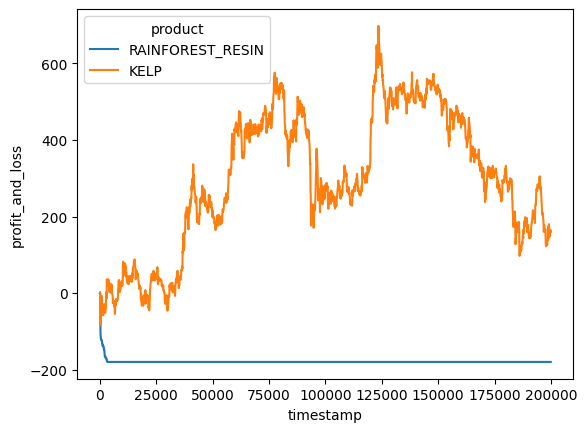

In [ ]:
sns.lineplot(data = data[['product', 'profit_and_loss', 'timestamp']],x = 'timestamp', y='profit_and_loss',hue = 'product')


In [29]:
data['vwap'] = (data['bid_price_1']*data['bid_volume_1']+data['bid_price_2']*data['bid_volume_2']+data['bid_price_3']*data['bid_volume_3']+\
data['ask_price_1']*data['ask_volume_1']+data['ask_price_2']*data['ask_volume_2']+data['ask_price_3']*data['ask_volume_3'])/(data['ask_volume_1']+data['ask_volume_2']+data['ask_volume_3']+data['bid_volume_1']+data['bid_volume_2']+data['bid_volume_3'])

In [162]:
def pnl(data, products = None):
    '''
    `data` must be a dataframe
    `products` must be a list of strings'''
    if products == None:
        productsdf = data['product'].unique()
        n = len(productsdf)
        if n>2:
            f,a = fa(x = 2, y = (n+1//2), size = (14,((n+1//2))*6))
            for i in range(n):
                sns.lineplot(data = data[data['product'] == productsdf[i]][['timestamp', 'profit_and_loss']], x= 'timestamp', y='profit_and_loss', ax = a[i//2, i%2])
                a[i//2, i%2].set_title(f'{productsdf[i]}')
                a[i//2, i%2].grid()
        else:
            
            f,a = fa(x = n, y = 1, size = (14,((n+1//2))*6))
            for i in range(n):
                sns.lineplot(data = data[data['product'] == productsdf[i]][['timestamp', 'profit_and_loss']], x= 'timestamp', y='profit_and_loss', ax = a[i])
                a[i].set_title(f'{productsdf[i]}')
                a[i].grid()

    else:
        n = len(products)
        if n>2:
            f,a = fa(x = 2, y = (n+1)//2 + 1, size = (14,(n+1//2)*6))
            for i in range(n):
                sns.lineplot(data = data[data['product'] == productsdf[i]][['timestamp', 'profit_and_loss']], x= 'timestamp', y='profit_and_loss', ax = a[i//2, i%2])
                a[i//2, i%2].set_title(f'{products[i]}')
                a[i//2, i%2].grid()
        elif n == 1:
            f,a = fa(size = (14,6))
            sns.lineplot(data = data[data['product'] == products[0]][['timestamp', 'profit_and_loss']], x= 'timestamp', y='profit_and_loss', ax = a)
            a.set_title(f'{products[0]}')
            a.grid()
        elif n == 2:
            f,a = fa(x = 2, y = 1, size = (14,6))
            for i in range(2):
                sns.lineplot(data = data[data['product'] == products[i]][['timestamp', 'profit_and_loss']], x= 'timestamp', y='profit_and_loss', ax = a[i])
                a[i].set_title(f'{products[0]}')
                a[i].grid()

    return f
        


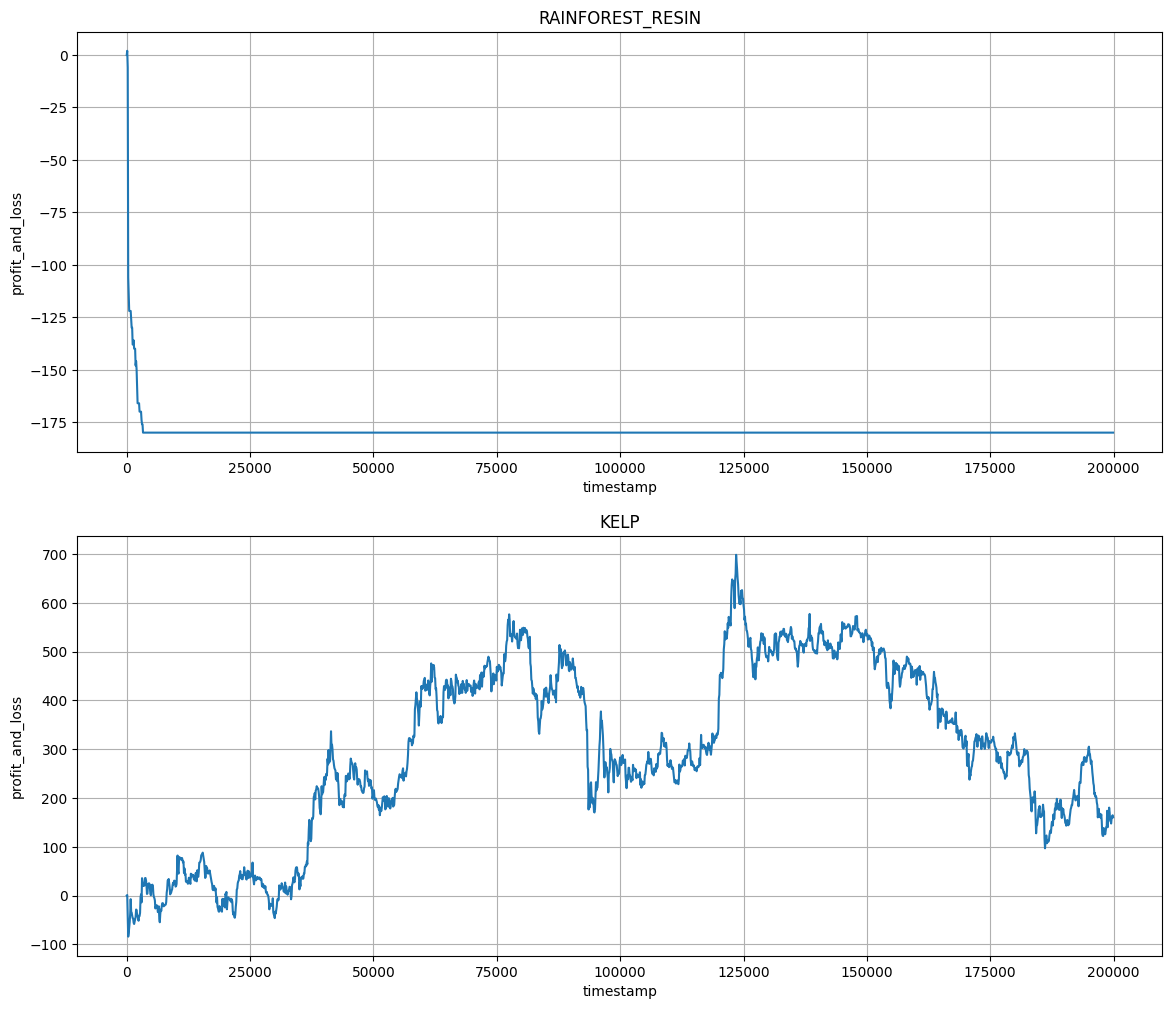

In [165]:
pnl(data)

range(0, 0)

In [127]:
from visualiser import Visualiser

vis = Visualiser(r'/Users/mirazrai/Downloads/other studies/Prosperity-3/algoresults/fdc69852-9edd-445f-9c9a-f516b3ad5e5c.csv')
vis.pnl(products = ['KELP'])

/Users/mirazrai/Downloads/other studies/Prosperity-3/algoresults/visualiser.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  return plt.subplots(x,y,figsize = size)


UnboundLocalError: local variable 'productsdf' referenced before assignment